In [26]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [27]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

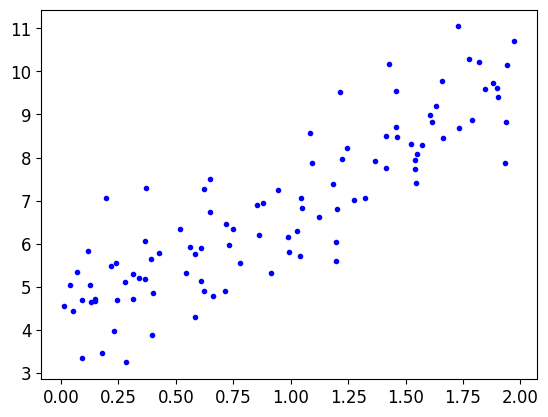

In [28]:
plt.plot(X, y, 'b.')
plt.show()

In [29]:
X_b = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [30]:
theta

array([[4.21509616],
       [2.77011339]])

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# # y = 1 * x_0 + 2 * x_1 + 3
# y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
print(reg.coef_)
print(reg.intercept_)

[[2.77011339]]
[4.21509616]


In [33]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * np.dot(X_b.T, (X_b.dot(theta) - y))
    theta -= eta * gradients
theta

array([[4.21509616],
       [2.77011339]])

## 多项式回归

In [34]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + np.random.randn(m, 1)

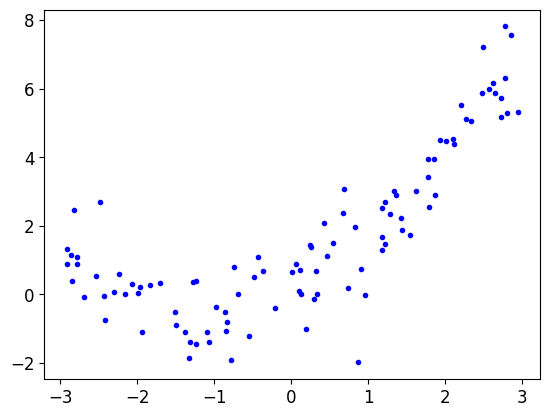

In [36]:
plt.plot(X, y, 'b.')

In [38]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X_r = X.reshape(10, 10)
X_r

array([[-1.82854207,  1.33471269, -1.31536583, -2.8541042 ,  0.87283378,
        -1.93733592,  2.64275151,  2.72357146,  2.48918634, -0.7790478 ],
       [-2.9072603 ,  2.56991138, -0.43089511,  2.79992891,  2.78171986,
         2.11805673, -1.23330665, -0.68941363,  2.10682003, -1.09846797],
       [-1.98304352,  0.34080757,  2.61692864,  1.17617878,  0.42036702,
        -2.41694104,  0.69004336,  2.9403231 , -2.15949591,  0.10997791],
       [ 2.26423843,  1.44461171,  1.18209445,  1.2149045 , -0.84305309,
        -1.23844893,  1.85616693,  1.86068037,  2.20243391,  2.47944332],
       [ 0.06805439,  0.00909777,  1.78977107,  0.89978358,  1.21180126,
         1.77475602,  2.34003205, -0.97202906, -0.74650228, -2.43610836],
       [ 0.46968085, -2.78434636, -0.20641189,  0.25586781, -1.28075249,
         0.54499956, -2.8169985 , -2.77591087,  1.93560336, -0.83885615],
       [-2.23763692,  0.13345956,  1.61996132, -1.70507384,  0.73734285,
        -2.48791521, -2.68990967,  0.18812779

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_r)
X_poly

array([[-1.82854207e+00,  1.33471269e+00, -1.31536583e+00,
        -2.85410420e+00,  8.72833775e-01, -1.93733592e+00,
         2.64275151e+00,  2.72357146e+00,  2.48918634e+00,
        -7.79047798e-01,  3.34356611e+00, -2.44057831e+00,
         2.40520175e+00,  5.21884961e+00, -1.59601328e+00,
         3.54250025e+00, -4.83238232e+00, -4.98016501e+00,
        -4.55158195e+00,  1.42452168e+00,  1.78145797e+00,
        -1.75563546e+00, -3.80940910e+00,  1.16498232e+00,
        -2.58578685e+00,  3.52731398e+00,  3.63518540e+00,
         3.32234860e+00, -1.03980498e+00,  1.73018725e+00,
         3.75419113e+00, -1.14809572e+00,  2.54830547e+00,
        -3.47618502e+00, -3.58249282e+00, -3.27419065e+00,
         1.02473285e+00,  8.14591079e+00, -2.49115855e+00,
         5.52935860e+00, -7.54268818e+00, -7.77335675e+00,
        -7.10439719e+00,  2.22348359e+00,  7.61838800e-01,
        -1.69097223e+00,  2.30668277e+00,  2.37722516e+00,
         2.17264591e+00, -6.79979231e-01,  3.75327048e+0

In [40]:
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_poly, y)
reg.score(X_poly, y)
print(reg.coef_)
print(reg.intercept_)

[[1.01510957 0.4636146 ]]
[0.11516173]


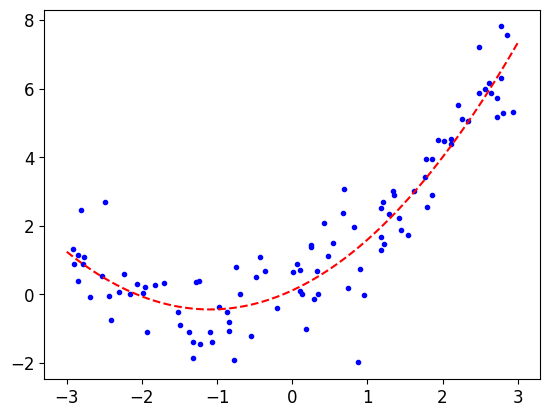

In [44]:
plt.plot(X, y, 'b.')
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r--')

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train).score(X_test, y_test)
# An estimator's parameter can be set using '__' syntax
pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.76

## 正则化

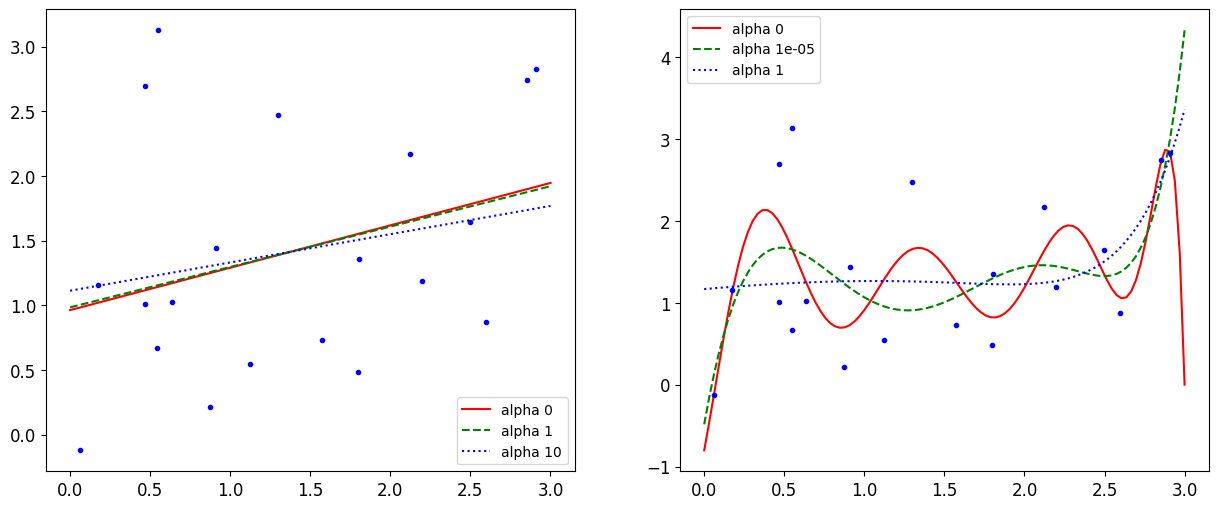

In [51]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + 1 + np.random.randn(m, 1)
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_type, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('r-', 'g--', 'b:')):
        model = model_type(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
                             ('scaler', StandardScaler()),
                             ('reg', model)])
        else:
            model = Pipeline([('scaler', StandardScaler()),('reg', model)])
        model.fit(X, y)
        y_new = model.predict(X_new)
        plt.plot(X_new, y_new, style, label=f'alpha {alpha}')
    plt.plot(X, y, 'b.')
    plt.legend()
    
plt.figure(figsize=(15, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 1, 10))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))
plt.show()

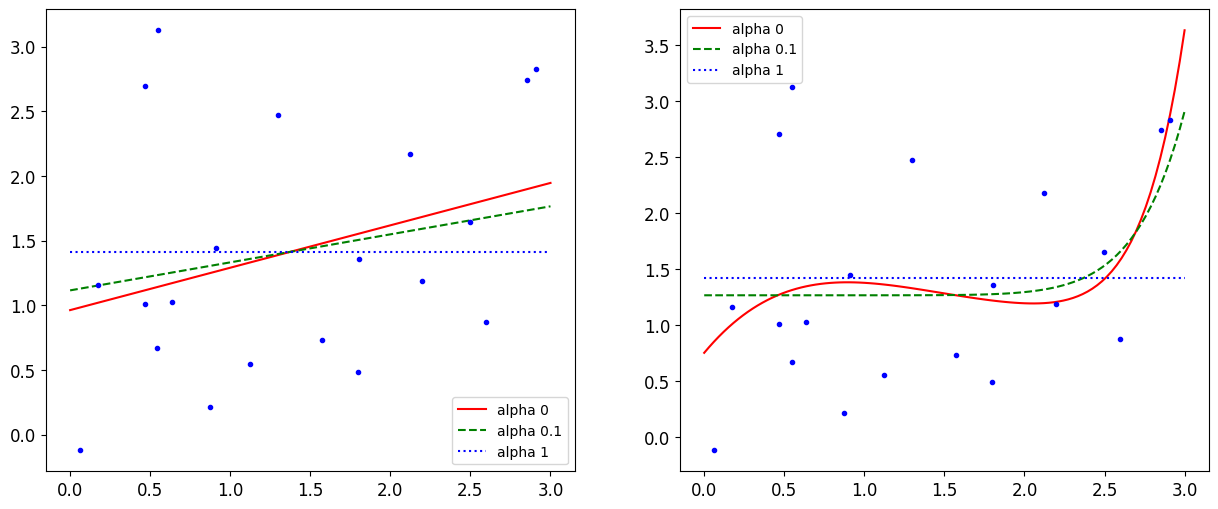

In [53]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15, 6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-1, 1))
plt.show()